# Olson - Assignment 4
## Part 1 - Read in the Data Set
- Using the Pandas native csv reading I read the iris.txt into a DataFrame df
- By setting matplotlib inline it forces matplot to plot in line.

In [83]:
%matplotlib inline

import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt

df = pd.read_csv("iris.txt")

## Part 2 - Explore the Data
- Using the native dataframe head command I am able to confirm the state of the data
- The data is in a usable format

In [73]:
print(df.head())

   SepalLength  SepalWidth  PetalLength  PetalWidth      Species
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


## Part 3 - Create Reduced Dataset
- I used the DataFrame command to select specific columns for my new dataframe

In [74]:
pdf = pd.DataFrame(df,columns=['PetalLength','PetalWidth'])

## Part 4 - Create a Scatter Plot
- I used the matplat commands to create a scatter plot using PetalLength as x and PetalWidth as y

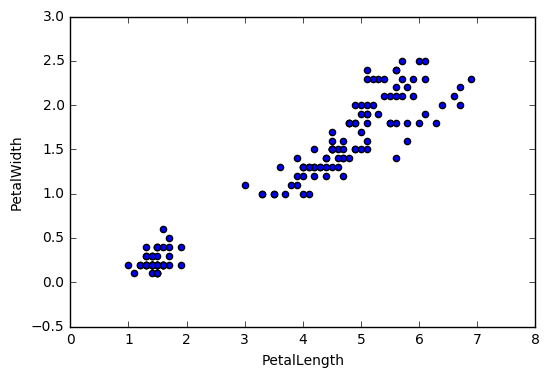

In [75]:
pdf.plot.scatter(x='PetalLength',y='PetalWidth')

## Part 5 - Implement Basic Functions to create regression Model
- I first created 2 arrays using the dataframe.values for each individual X and Y
- I then stacked a column of 1's to the X Matrix
- I then transposed the X matrix
- Then I multiplied the X and its transpose
- I then inverted the answer
- I then multiplied the Y matrix by the transposed X matrix
- I then Multiplied the inverted original by the answer to the Ydot multiplication
- This produced Beta or a 1x2 matrix for our values

- I then created a function to bring in an x value and the Beta and return the predicted Y value

In [76]:
def coef(pdf):
    X = pdf['PetalLength'].values
    Y = pdf['PetalWidth'].values
    O = np.ones(len(pdf))
    X1 = np.stack((O,X), axis=-1)
    XX = np.transpose(X1)
    Xdot = np.dot(XX,X1)
    Xinv = np.linalg.inv(Xdot)
    Xident = np.dot(Xdot,Xinv)
    Ydot = np.dot(XX,Y)
    Beta = np.dot(Xinv,Ydot)
    print(Beta)
    return Beta


def pred(x,Beta):
    y = Beta[0]+(x*Beta[1])
    return y



## Part 6 - Calculate predicted values
- Using my functions above I calculate Beta
- Once I have Beta I run the prediction function to create a 3rd column in the datafram called predicted value

In [90]:
Beta = coef(pdf)
pdf['PredictedValue'] = pred(pdf['PetalLength'],Beta)

[-0.36651405  0.41641913]


## Part 7 - Plot the Regression Line n top of the Scatter Plot
- I created 3 arrays for the PetalLength, PetalWidth, and Predicted Values
- I then created the scatter plot of the actual values
- I plotted the line of the X Values against the predicted values

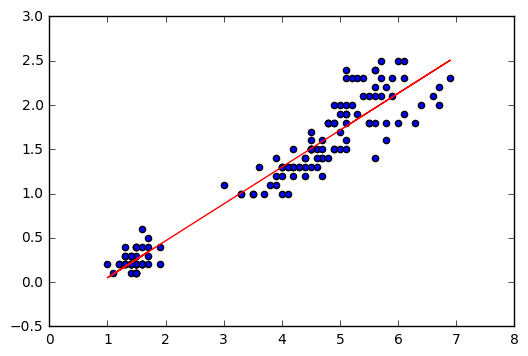

In [89]:
X = pdf['PetalLength'].values
Y = pdf['PetalWidth'].values
Z = pdf['PredictedValue'].values

plt.scatter(X,Y)
plt.plot(X,Z, color = "red")